# Chess Games 

Підключаємо потрібні бібліотеки та читаємо датасет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('chess_games.csv')
df.head()


game_id  rated  turns victory_status winner time_increment       white_id  \
0        1  False     13    Out of Time  White           15+2       bourgris   
1        2   True     16         Resign  Black           5+10           a-00   
2        3   True     61           Mate  White           5+10         ischia   
3        4   True     61           Mate  White           20+0  daniamurashov   
4        5   True     95           Mate  White           30+3      nik221107   

   white_rating      black_id  black_rating  \
0          1500          a-00          1191   
1          1322     skinnerua          1261   
2          1496          a-00          1500   
3          1439  adivanov2009          1454   
4          1523  adivanov2009          1469   

                                               moves opening_code  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...          C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...          D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...          C41   

   opening_moves                        opening_fullname    opening_shortname  \
0              5        Slav Defense: Exchange Variation         Slav Defense   
1              4  Nimzowitsch Defense: Kennedy Variation  Nimzowitsch Defense   
2              3   King's Pawn Game: Leonardis Variation     King's Pawn Game   
3              3  Queen's Pawn Game: Zukertort Variation    Queen's Pawn Game   
4              5                        Philidor Defense     Philidor Defense   

  opening_response    opening_variation  
0              NaN   Exchange Variation  
1              NaN    Kennedy Variation  
2              NaN  Leonardis Variation  
3              NaN  Zukertort Variation  
4              NaN                  NaN

Робимо стандартизацію даних для використання візуалізації PCA та t-SNE.

C:\Users\User\AppData\Local\Temp\ipykernel_11356\2290506741.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('viridis', len(df['winner_label'].unique()))  # Ви можете вибрати іншу палітру


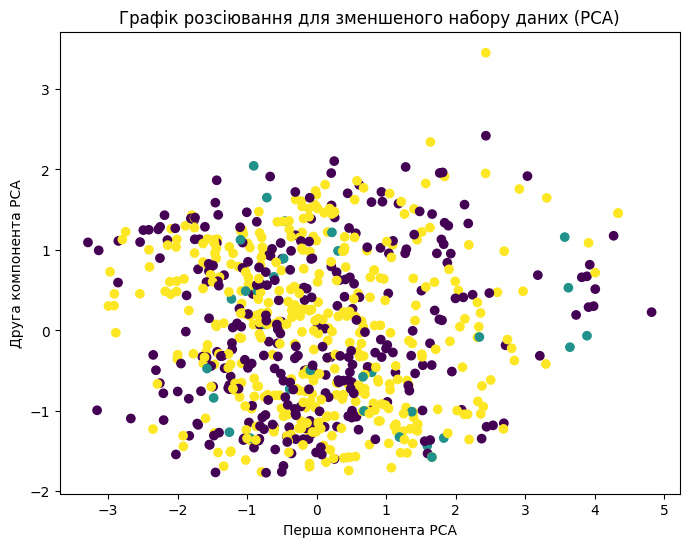

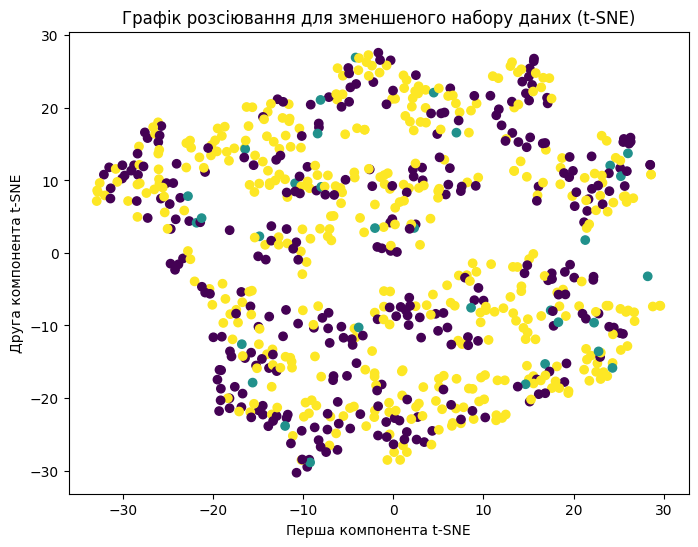

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  # Додано імпорт t-SNE
from sklearn.preprocessing import LabelEncoder

# Обробка текстових даних і видалення рядків з нульовими значеннями
# Наприклад, якщо ви хочете видалити рядки з нульовими значеннями в усіх стовпцях:
df.drop('turns', axis = 1, inplace = True)
df.dropna(inplace=True)

# Стандартизація числових даних
scaler = StandardScaler()
numeric_data = df.select_dtypes(include=[int, float])
scaled_data = scaler.fit_transform(numeric_data)
numeric_data.head

# Метод зменшення розмірності (PCA)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(scaled_data)

# Метод зменшення розмірності (t-SNE)
tsne = TSNE(n_components=2, random_state=42)  # Вказуємо кількість компонентів та random_state
reduced_data_tsne = tsne.fit_transform(scaled_data)

# Оскільки "winner" містить текстові значення, ми використовуємо LabelEncoder для перетворення їх на числові мітки
label_encoder = LabelEncoder()
df['winner_label'] = label_encoder.fit_transform(df['winner'])

# Визначення палітри кольорів для точок
color_palette = plt.cm.get_cmap('viridis', len(df['winner_label'].unique()))  # Ви можете вибрати іншу палітру

# Графік розсіювання для зменшеного набору даних (PCA) з розфарбованими точками
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=df['winner_label'], cmap=color_palette)
plt.xlabel('Перша компонента PCA')
plt.ylabel('Друга компонента PCA')
plt.title('Графік розсіювання для зменшеного набору даних (PCA)')
plt.show()

# Графік розсіювання для зменшеного набору даних (t-SNE) з розфарбованими точками
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=df['winner_label'], cmap=color_palette)
plt.xlabel('Перша компонента t-SNE')
plt.ylabel('Друга компонента t-SNE')
plt.title('Графік розсіювання для зменшеного набору даних (t-SNE)')
plt.show()


З графіків можемо побачити, що дані приблизно однаково розподіляються в обох випадках.

# Amazon Sales Dataset 📦 (https://www.kaggle.com/datasets/ahmedsayed564/amazon-sales-dataset/data)

In [4]:
text = pd.read_csv('Amazon.csv')
text.head()

product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,208                 58%    4.1        8,131   
2       ₹1,339                 44%    4.2     1,79,692   
3         ₹499                 20%    4.3       27,201   
4         ₹375                 26%    4.3       31,534   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                             user_id  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
1  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
2  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
3  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...   
4  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   

                                           user_name  \
0  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
1  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
2  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   
3  T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...   
4  Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...   

                                           review_id  \
0  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
1  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
2  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   
3  R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...   
4  R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...   

                                        review_title  \
0  good tool to use for,Brand is always good,Over...   
1  good tool to use for,Brand is always good,Over...   
2  Works on linux for me. Get the model with ante...   
3  Works Good,Perfect replacement cell for trimme...   
4  Handy Mouse,Good quality mouse,Good one.,Good,...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  good quality tool from d linkWiFi signal is go...   
2  I use this to connect an old PC to internet. I...   
3  Works good,Bought it to replace my Phillips QT...   
4  Liked this Product,https://m.media-amazon.com/...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
3  https://m.media-amazon.com/images/I/418YrbHVLC...   
4  https://m.media-amazon.com/images/I/31iFF1Kbkp...   

                                        product_link  
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...  
1  https://www.amazon.in/D-Link-DWA-131-Wireless-...  
2  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...  
3  https://www.amazon.in/Duracell-AAA-750mAh-Rech...  
4  https://www.amazon.in/Logitech-B100-Optical-Mo...

Імпортуємо бібліотеки для токенізації тексту.

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
text['combined_text'] = text['about_product'] + ' ' + text['review_content']

# Використання word_tokenize для розбиття тексту на слова
text['tokenized_text'] = text['combined_text'].apply(word_tokenize)

# Вивід перших 5 рядків нового DataFrame для перевірки результату
text['tokenized_text'].head()


0    [Connects, your, computer, to, a, high-speed, ...
1    [Connects, your, computer, to, a, high-speed, ...
2    [150, Mbps, Wi-Fi, ——, Exceptional, wireless, ...
3    [Duracell, Rechargeable, AAA, 750mAh, batterie...
4    [A, comfortable, ,, ambidextrous, shape, feels...
Name: tokenized_text, dtype: object

Після того, як текст розділений на токени, можемо зайнятись видаленням стоп-слів.

In [7]:
# Завантаження списку стоп-слів для англійської мови
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Виведення перших п'яти стоп-слів
print(list(stop_words)[:5])

['other', 'at', 'until', 'most', 'to']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Визначаємо функцію для видалення стоп-слів зі списку токенів
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Застосуємо функцію до стовпця "tokenized_text"
text['tokenized_text'] = text['tokenized_text'].apply(remove_stopwords)

text['tokenized_text'].head()

0    [Connects, computer, high-speed, wireless, net...
1    [Connects, computer, high-speed, wireless, net...
2    [150, Mbps, Wi-Fi, ——, Exceptional, wireless, ...
3    [Duracell, Rechargeable, AAA, 750mAh, batterie...
4    [comfortable, ,, ambidextrous, shape, feels, g...
Name: tokenized_text, dtype: object

Тут можемо порівняти вихід цієї комірки з попередньою та побачити, що відсутні вказані слова з попереднього списку стоп-слів.

Далі можна зробити стемінг та лематизацію.

In [9]:
# Створюємо об'єкт стеммера
stemmer = PorterStemmer()

# Визначаємо функцію для стемінгу списку токенів
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Застосуємо функцію до стовпця "tokenized_text"
text['stemmed_text'] = text['tokenized_text'].apply(stem_tokens)
# Виведемо датасет зі зстемованими токенами
print(text['stemmed_text'])

0       [connect, comput, high-spe, wireless, network|...
1       [connect, comput, high-spe, wireless, network|...
2       [150, mbp, wi-fi, ——, except, wireless, speed,...
3       [duracel, recharg, aaa, 750mah, batteri, stay,...
4       [comfort, ,, ambidextr, shape, feel, good, eit...
                              ...                        
1460    [batteri, oper, milk, frother, easi, control, ...
1461    [khaitan, orfin, fan, heater, home, kitchen|po...
1462    [-make, delici, milk, foam, creamer, drink, ho...
1463    [💎, [, fastest, charg, ], -, iphon, usb, c, ca...
1464    [✔quick, electr, hot, water, tap, heat, tube, ...
Name: stemmed_text, Length: 1465, dtype: object


In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Створіть об'єкт лематизатора
lemmatizer = WordNetLemmatizer()

# Визначте функцію для лематизації списку токенів
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Застосуйте функцію до стовпця "tokenized_text"
text['lemmatized_text'] = text['tokenized_text'].apply(lemmatize_tokens)
print(text['lemmatized_text'])


0       [Connects, computer, high-speed, wireless, net...
1       [Connects, computer, high-speed, wireless, net...
2       [150, Mbps, Wi-Fi, ——, Exceptional, wireless, ...
3       [Duracell, Rechargeable, AAA, 750mAh, battery,...
4       [comfortable, ,, ambidextrous, shape, feel, go...
                              ...                        
1460    [battery, operated, milk, frother, easy, contr...
1461    [Khaitan, Orfin, Fan, heater, Home, kitchen|PO...
1462    [-Make, delicious, milk, foam, creamer, drink,...
1463    [💎, [, Fastest, Charge, ], -, iPhone, USB, C, ...
1464    [✔Quick, Electric, Hot, Water, Tap, Heating, t...
Name: lemmatized_text, Length: 1465, dtype: object


In [12]:
text.head()

product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,208                 58%    4.1        8,131   
2       ₹1,339                 44%    4.2     1,79,692   
3         ₹499                 20%    4.3       27,201   
4         ₹375                 26%    4.3       31,534   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                             user_id  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
1  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
2  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
3  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...   
4  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   

                                           user_name  \
0  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
1  nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...   
2  Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...   
3  T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...   
4  Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...   

                                           review_id  \
0  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
1  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
2  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   
3  R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...   
4  R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...   

                                        review_title  \
0  good tool to use for,Brand is always good,Over...   
1  good tool to use for,Brand is always good,Over...   
2  Works on linux for me. Get the model with ante...   
3  Works Good,Perfect replacement cell for trimme...   
4  Handy Mouse,Good quality mouse,Good one.,Good,...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  good quality tool from d linkWiFi signal is go...   
2  I use this to connect an old PC to internet. I...   
3  Works good,Bought it to replace my Phillips QT...   
4  Liked this Product,https://m.media-amazon.com/...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
3  https://m.media-amazon.com/images/I/418YrbHVLC...   
4  https://m.media-amazon.com/images/I/31iFF1Kbkp...   

                                        product_link  \
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
1  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
2  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...   
3  https://www.amazon.in/Duracell-AAA-750mAh-Rech...   
4  https://www.amazon.in/Logitech-B100-Optical-Mo...   

                                       combined_text  \
0  Connects your computer to a high-speed wireles...  

In [13]:
from nltk.corpus import wordnet as wn

# Визначаємо функцію для отримання лемм слів
def get_lemmas(text):
    lemmas = []  # Сюди будемо зберігати лемми

    for word in text:
        # Отримуємо синсет для слова (передпокладаючи, що це іменник)
        synset = wn.synsets(word, pos=wn.NOUN)
        
        if synset:
            # Якщо є синсет, беремо перший (найбільш спільний)
            lemma = synset[0].lemmas()[0].name()
            lemmas.append(lemma)
        else:
            # Якщо не знайдено синсет, залишаємо слово без змін
            lemmas.append(word)
    
    return lemmas

# Застосуємо функцію до стовпця "lemmatized_text" в вашому датасеті
text['lemmas'] = text['lemmatized_text'].apply(get_lemmas)

# Виведемо перші 5 рядків для перевірки
text.head()


product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,208                 58%    4.1        8,131   
2       ₹1,339                 44%    4.2     1,79,692   
3         ₹499                 20%    4.3       27,201   
4         ₹375                 26%    4.3       31,534   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                             user_id  ...  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
1  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
2  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...  ...   
3  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...  ...   
4  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...  ...   

                                           review_id  \
0  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
1  R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...   
2  R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...   
3  R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...   
4  R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...   

                                        review_title  \
0  good tool to use for,Brand is always good,Over...   
1  good tool to use for,Brand is always good,Over...   
2  Works on linux for me. Get the model with ante...   
3  Works Good,Perfect replacement cell for trimme...   
4  Handy Mouse,Good quality mouse,Good one.,Good,...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  good quality tool from d linkWiFi signal is go...   
2  I use this to connect an old PC to internet. I...   
3  Works good,Bought it to replace my Phillips QT...   
4  Liked this Product,https://m.media-amazon.com/...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
3  https://m.media-amazon.com/images/I/418YrbHVLC...   
4  https://m.media-amazon.com/images/I/31iFF1Kbkp...   

                                        product_link  \
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
1  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
2  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...   
3  https://www.amazon.in/Duracell-AAA-750mAh-Rech...   
4  https://www.amazon.in/Logitech-B100-Optical-Mo...   

                                       combined_text  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                      tokenized_text  \
0  [Connects, computer, 

На цьому етапі будемо користуватись стовпцем "lemmas" як цільовим, бо наразі там знаходиться майже кінцевий оброблений текст.

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Визначаєсо функцію для визначення частин мови для кожного слова
def pos_tag_text(lemmas):
    return pos_tag(lemmas)

# Застосуємо функцію до стовпця "tokenized_text" і збережіть результат у новому стовпці "pos_tags"
text['pos_tags'] = text['lemmas'].apply(pos_tag_text)

# Виведемо результат
print(text[['lemmas', 'pos_tags']])

                                                 lemmas  \
0     [Connects, computer, high-speed, radio, networ...   
1     [Connects, computer, high-speed, radio, networ...   
2     [150, Mbps, Wi-Fi, ——, Exceptional, radio, spe...   
3     [Duracell, Rechargeable, abdominal_aortic_aneu...   
4     [comfortable, ,, ambidextrous, shape, feel, go...   
...                                                 ...   
1460  [battery, operated, milk, frother, easy, contr...   
1461  [Khaitan, Orfin, fan, heater, home, kitchen|PO...   
1462  [-Make, Delicious, milk, foam, cream_pitcher, ...   
1463  [💎, [, Fastest, charge, ], -, iPhone, USB, deg...   
1464  [✔Quick, electric, Hot, water, pat, heating, t...   

                                               pos_tags  
0     [(Connects, NNS), (computer, NN), (high-speed,...  
1     [(Connects, NNS), (computer, NN), (high-speed,...  
2     [(150, CD), (Mbps, NNP), (Wi-Fi, NNP), (——, NN...  
3     [(Duracell, NNP), (Rechargeable, NNP), (abdomi...  
4

Тут можемо побачити, що вдалося визначити частини мови кожного слова.

Останнім кроком обов'язково потрібно позбавитись в тексті знаків пунктуації та інших сторонніх символів.

In [17]:
print(text['lemmas'].apply(type).unique())

[<class 'list'>]


In [18]:
import re
import string

def clean_text(lemmas):
    if isinstance(lemmas, list):
        # Перетворення списку слів в рядок, приведення до нижнього регістру і подальша обробка
        text = ' '.join(lemmas).lower()
        text = re.sub(r"https*\S+", " ", text)
        text = re.sub(r":", " ", text)
        text = re.sub(r"\.", " ", text)
        text = re.sub(r";", " ", text)
        text = re.sub(r"\*", " ", text)
        text = re.sub(r"#\S+", " ", text)
        text = re.sub(r"\d", " ", text)
        text = re.sub(r'[()\s]+', ' ', text)
        text = re.sub(r'[%s]' % re.escape(string.punctuation + ','), ' ', text)
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'\s{2,}', ' ', text)
        text = ' '.join([word for word in text.split(' ') if word not in stop_words])
        return text
    elif isinstance(lemmas, str):
        return lemmas  # Повертаємо рядок без змін
    else:
        return ""  # Повертаємо порожній рядок для всіх інших значень

# Застосовуємо функцію до стовпця 'lemmas' і зберігаємо результат в тому ж стовпці
text['lemmas'] = text['lemmas'].apply(clean_text)

# Виведення деяких рядків для перевірки результатів
text.head()



product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,208                 58%    4.1        8,131   
2       ₹1,339                 44%    4.2     1,79,692   
3         ₹499                 20%    4.3       27,201   
4         ₹375                 26%    4.3       31,534   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                             user_id  ...  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
1  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
2  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...  ...   
3  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...  ...   
4  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...  ...   

                                        review_title  \
0  good tool to use for,Brand is always good,Over...   
1  good tool to use for,Brand is always good,Over...   
2  Works on linux for me. Get the model with ante...   
3  Works Good,Perfect replacement cell for trimme...   
4  Handy Mouse,Good quality mouse,Good one.,Good,...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  good quality tool from d linkWiFi signal is go...   
2  I use this to connect an old PC to internet. I...   
3  Works good,Bought it to replace my Phillips QT...   
4  Liked this Product,https://m.media-amazon.com/...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
3  https://m.media-amazon.com/images/I/418YrbHVLC...   
4  https://m.media-amazon.com/images/I/31iFF1Kbkp...   

                                        product_link  \
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
1  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
2  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...   
3  https://www.amazon.in/Duracell-AAA-750mAh-Rech...   
4  https://www.amazon.in/Logitech-B100-Optical-Mo...   

                                       combined_text  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                      tokenized_text  \
0  [Connects, computer, high-speed, wireless, net...   
1  [Connects, computer, high-speed, wireless, net...   
2  [150, Mbps, Wi-Fi, ——, Exceptional, wireless, ...   
3  [Duracell, Rechargeable, AAA, 750mAh, batterie...   
4  [comfortable, ,, ambidextrous, shape, feels, g...   

                                        stemmed_text  \
0  [connect, comput, hig

Тепер можна візуалізувати дані, щоб побачити найбільш вживані слова.

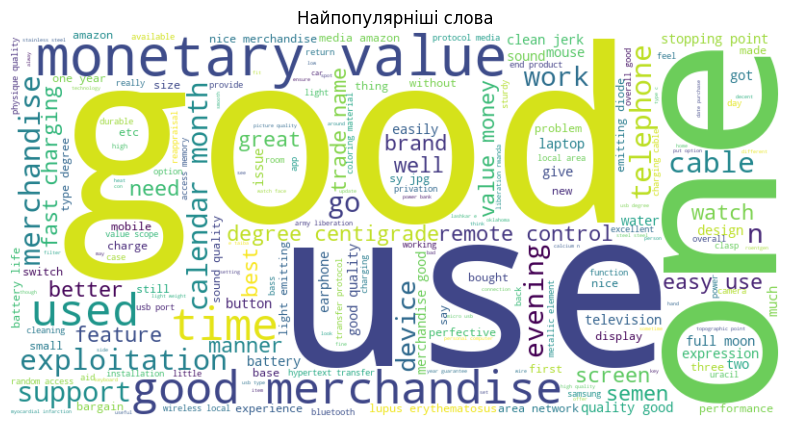

In [19]:
from wordcloud import WordCloud

# Об'єднайте всі тексти в один великий список слів
all_words = " ".join(text['lemmas'])

# Створення об'єкту WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Відображення хмари слів
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найпопулярніші слова')
plt.show()



З візуалізації бачимо, що є сенс позбавитись слів: one, good, use. Ці слова не несуть багато сенсу, але найчастіше зустрічаються в даних.

In [20]:
# Список слів, які потрібно видалити
words_to_remove = ["one", "good", "use", "device"]

# Функція для видалення слів із тексту
def remove_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_remove]
    return " ".join(filtered_words)

# Застосовуємо функцію до стовпчика "lemmas"
text['lemmas'] = text['lemmas'].apply(remove_words)


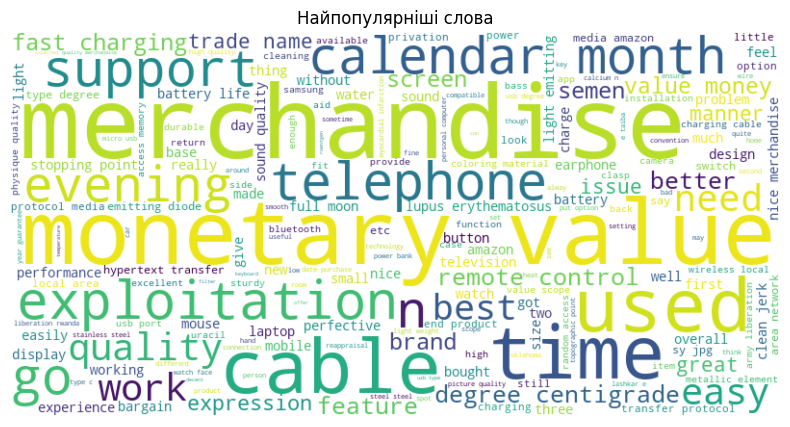

In [21]:
from wordcloud import WordCloud

# Об'єднайте всі тексти в один великий список слів
all_words = " ".join(text['lemmas'])

# Створення об'єкту WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Відображення хмари слів
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Найпопулярніші слова')
plt.show()


Тепер бачимо, що слова розподілені більш менш збалансовано.

Далі потрібно підготувати дані для навчання. Будемо робити прогнози на основі рейтигної оцінки відгуків і для цього спочатку подивимось розподіл оцінок для того, щоб обрати найбільш влучні критерії.

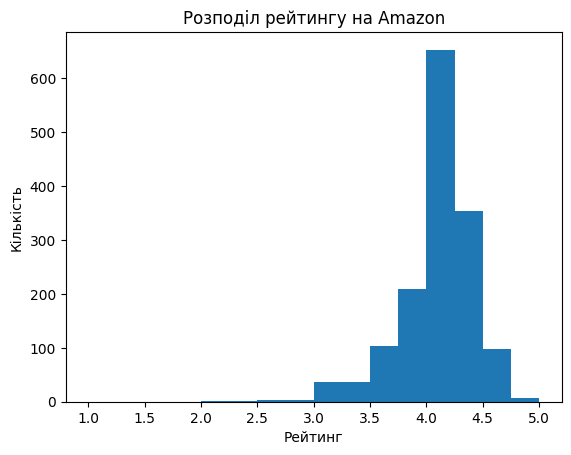

In [22]:

df = text

# Перетворення стовпця "rating" з рядкового типу (str) в тип float з перевіркою на можливість перетворення
def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None  # Якщо перетворення неможливе, повернути None

df["rating"] = df["rating"].apply(convert_to_float)

# Знайдені неперетворені значення
unconverted_values = df[df["rating"].isnull()]

# Видалення рядків з неможливими значеннями (None)
df = df.dropna(subset=["rating"])

# Побудова графіка розподілу (гістограми)
bins = [1, 1.5, 2, 2.5, 3, 3.5, 3.75, 4, 4.25, 4.5, 4.75,  5]  # Ви можете налаштувати інтервали за потребою
ax = df["rating"].plot.hist(bins=bins)
plt.xlabel('Рейтинг')
plt.ylabel('Кількість')
plt.title('Розподіл рейтингу на Amazon')
plt.show()

З графіку бачимо, що є сенс обрати розподіл на межі 4 зірок. Тепер товари з оцінками ніжче 4 зробимо нулями, а товари з оцінками вище 4 - одиницями.

In [23]:
# Функція для створення нового стовпця з мітками 0 і 1 в залежності від значень "rating"
def categorize_rating(rating):
    if rating < 4:
        return 0
    else:
        return 1

# Створення нового стовпця "rating_category" з мітками, використовуючи .loc
df.loc[:, "rating_category"] = df["rating"].apply(categorize_rating)

# Виведення перших декількох рядків для перевірки результату
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_11356\4144909788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "rating_category"] = df["rating"].apply(categorize_rating)


product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,208                 58%     4.1        8,131   
1       ₹1,208                 58%     4.1        8,131   
2       ₹1,339                 44%     4.2     1,79,692   
3         ₹499                 20%     4.3       27,201   
4         ₹375                 26%     4.3       31,534   

                                       about_product  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                             user_id  ...  \
0  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
1  AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...  ...   
2  AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...  ...   
3  AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...  ...   
4  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...  ...   

                                      review_content  \
0  good quality tool from d linkWiFi signal is go...   
1  good quality tool from d linkWiFi signal is go...   
2  I use this to connect an old PC to internet. I...   
3  Works good,Bought it to replace my Phillips QT...   
4  Liked this Product,https://m.media-amazon.com/...   

                                            img_link  \
0  https://m.media-amazon.com/images/I/31+NwZ8gb1...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/I/31Wb+A3VVd...   
3  https://m.media-amazon.com/images/I/418YrbHVLC...   
4  https://m.media-amazon.com/images/I/31iFF1Kbkp...   

                                        product_link  \
0  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
1  https://www.amazon.in/D-Link-DWA-131-Wireless-...   
2  https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...   
3  https://www.amazon.in/Duracell-AAA-750mAh-Rech...   
4  https://www.amazon.in/Logitech-B100-Optical-Mo...   

                                       combined_text  \
0  Connects your computer to a high-speed wireles...   
1  Connects your computer to a high-speed wireles...   
2  150 Mbps Wi-Fi —— Exceptional wireless speed u...   
3  Duracell Rechargeable AAA 750mAh batteries sta...   
4  A comfortable, ambidextrous shape feels good i...   

                                      tokenized_text  \
0  [Connects, computer, high-speed, wireless, net...   
1  [Connects, computer, high-speed, wireless, net...   
2  [150, Mbps, Wi-Fi, ——, Exceptional, wireless, ...   
3  [Duracell, Rechargeable, AAA, 750mAh, batterie...   
4  [comfortable, ,, ambidextrous, shape, feels, g...   

                                        stemmed_text  \
0  [connect, comput, high-spe, wireless, network|...   
1  [connect, comput, high-spe, wireless, network|...   
2  [150, mbp, wi-fi, ——, except, wireless, speed,...   
3  [duracel, recharg, aaa, 750mah, batteri, stay,...   
4  [comfort, ,, ambidextr, shape, feel, good, eit...   

                                     lemmatized_text  \
0  [Connects, comp

Зробивши підбір параметрів за допомогою Gridsearch, одразу застосуємо найкращі параметри.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Ознаки (текстова змінна)
corpus = df['lemmas']

# Цільова змінна
y = df['rating_category']

# Ініціалізація та побудова мішка слів зі stop_words та ngram_range
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(corpus)

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація та навчання моделі з найкращими параметри: {'C': 10, 'penalty': 'l2'}
clf = LogisticRegression(C=10, penalty='l2', random_state=0)
clf.fit(X_train, y_train)

# Прогноз
predicted = clf.predict(X_test)

# Виведення звіту про класифікацію
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.82      0.51      0.63        71
           1       0.86      0.96      0.91       222

    accuracy                           0.85       293
   macro avg       0.84      0.74      0.77       293
weighted avg       0.85      0.85      0.84       293



C:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Теж саме зробимо і для наступної моделі.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ознаки (текстова змінна)
corpus = df['lemmas']

# Цільова змінна
y = df['rating_category']

# Ініціалізація та побудова TF-IDF мішка слів зі stop_words та ngram_range
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(corpus)

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація та навчання моделі з певними параметрами
clf = LogisticRegression(C=100, penalty='l2', random_state=0)
clf.fit(X_train, y_train)

# Прогноз
predicted = clf.predict(X_test)

# Виведення звіту про класифікацію
print(classification_report(y_test, predicted))



              precision    recall  f1-score   support

           0       0.86      0.34      0.48        71
           1       0.82      0.98      0.90       222

    accuracy                           0.83       293
   macro avg       0.84      0.66      0.69       293
weighted avg       0.83      0.83      0.80       293



### Висновок 
З результатів можемо побачити, що трошки кращою виявилась логістична регресія з точністю 85 відсотків.

# Кластерізація

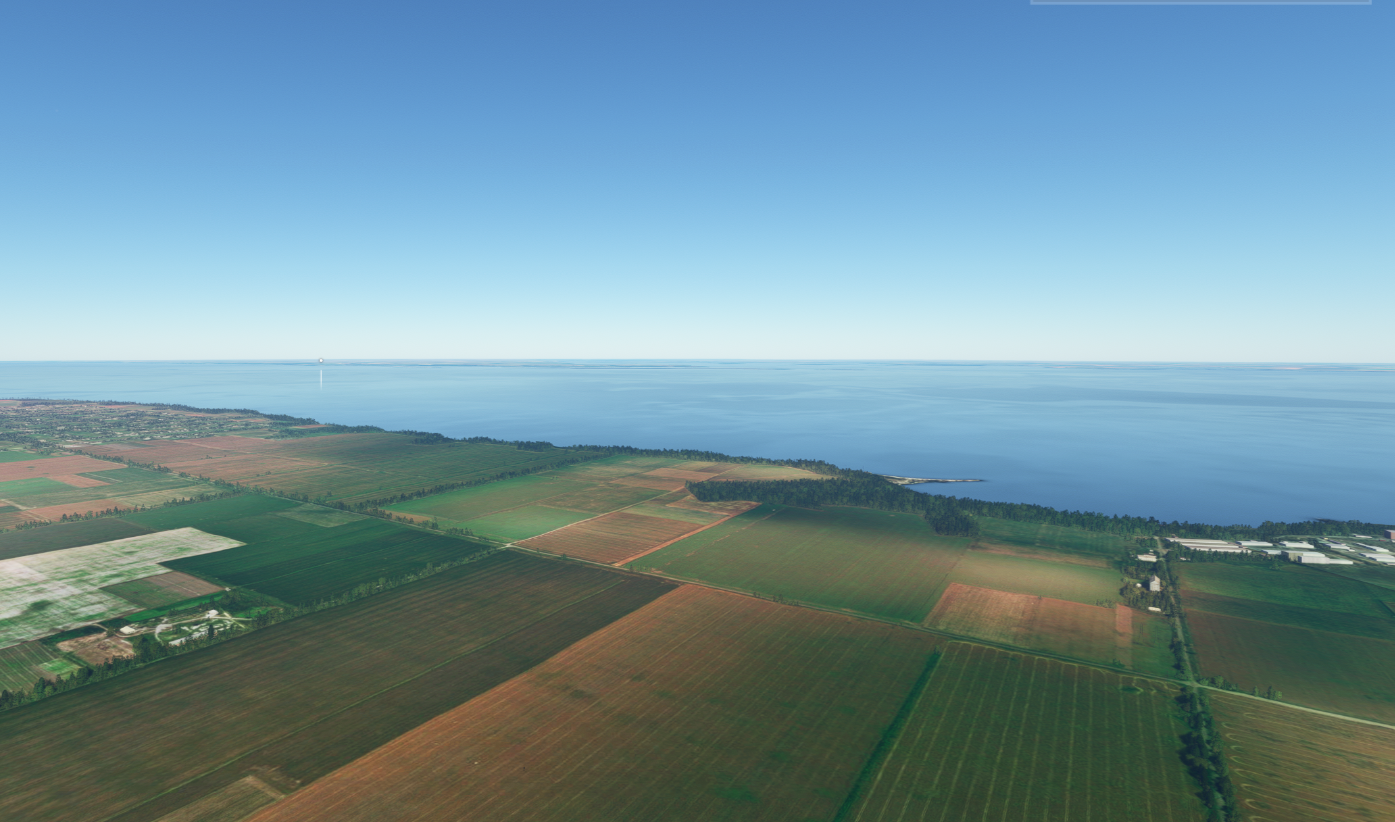

In [26]:
from IPython.display import Image

# Відобразіть зображення
Image(filename='dron_image.png')

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


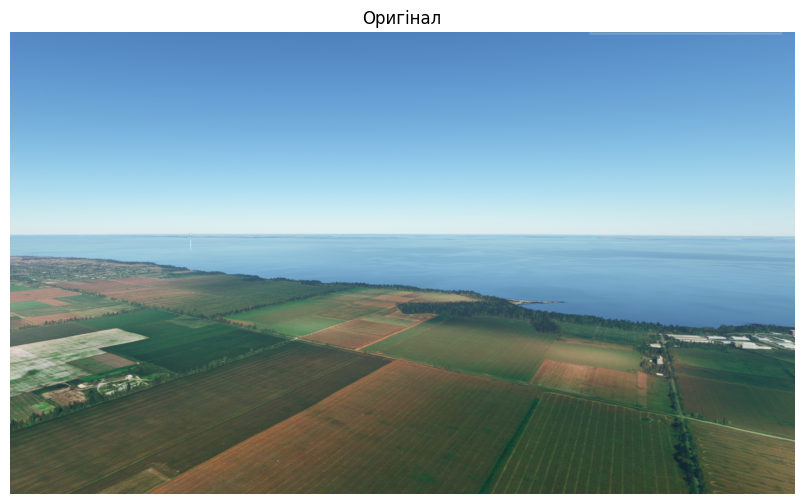

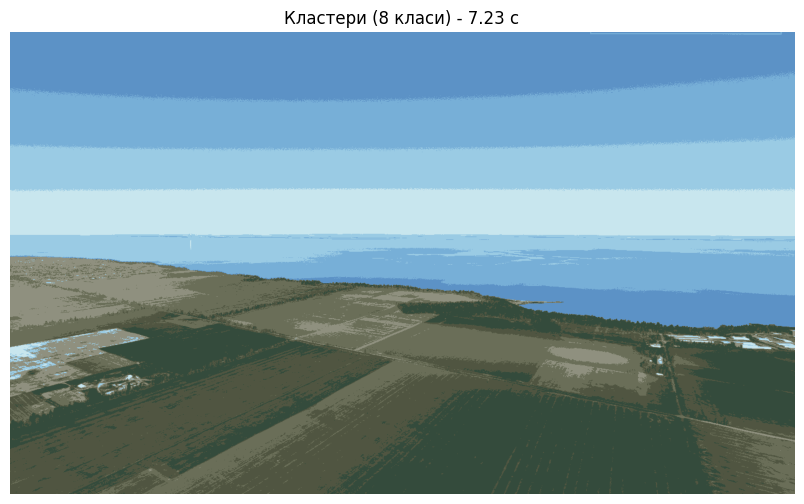

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


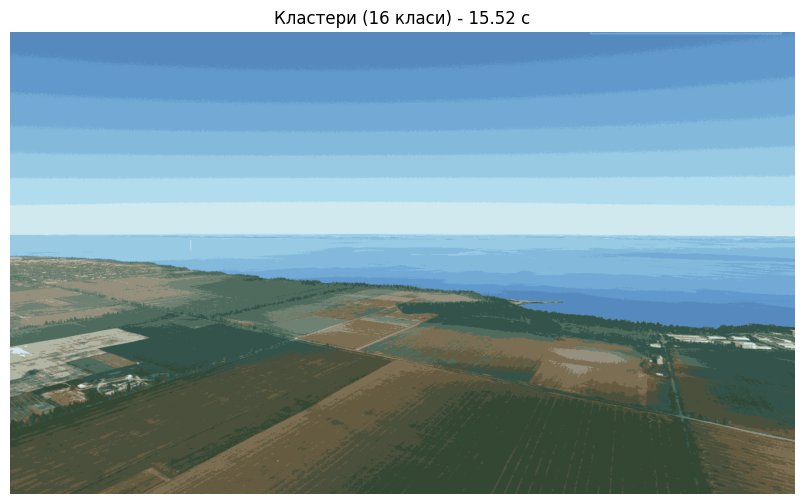

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


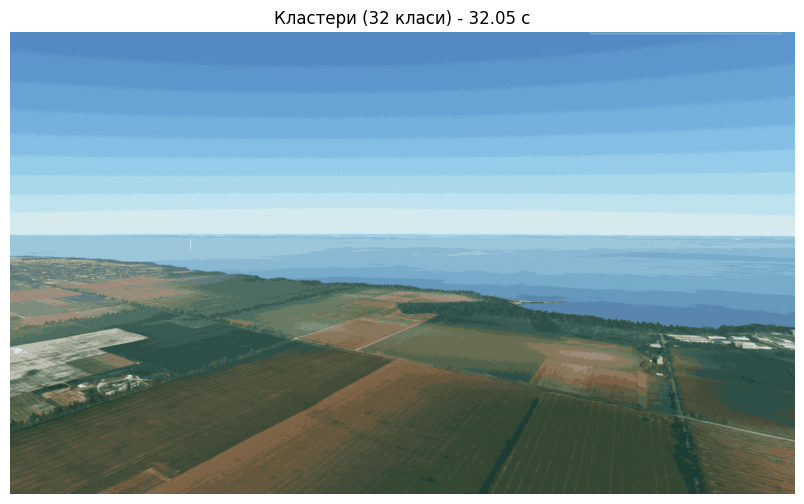

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


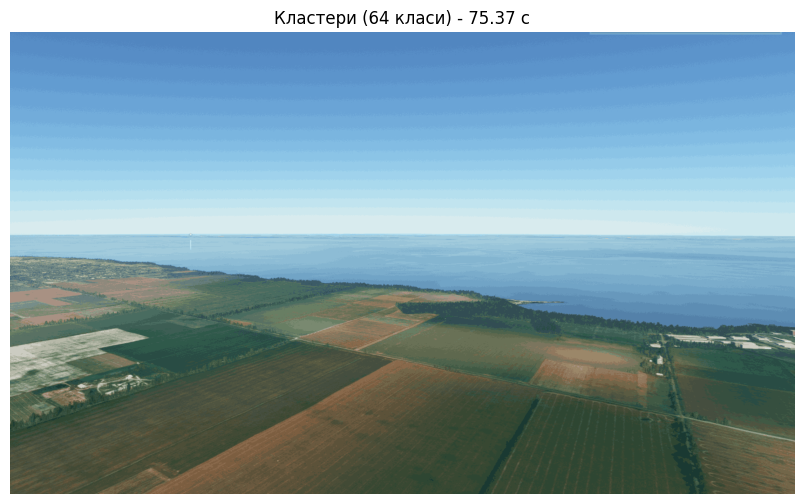

In [27]:
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time

# Завантаження зображення
image = mpimg.imread('dron_image.png')

# Розміри зображення
height, width, channels = image.shape

# Розкладіть зображення
image_2d = image.reshape(-1, channels)

# Кількість кластерів для порівняння
num_clusters_list = [8, 16, 32, 64]

# Виведемо декілька варіантів кластеризації одне під одним
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

# Оригінал
axs.imshow(image)  # Змінено axs[0] на axs
axs.axis('off')
axs.set_title('Оригінал')

for i, num_clusters in enumerate(num_clusters_list):
    # Виведемо декілька варіантів кластеризації одне під одним
    fig, axs = plt.subplots(1, 1, figsize=(16, 6))
    start_time = time.time()
    # Використовуйте алгоритм K-Means для кластеризації
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(image_2d)

    # Отримайте центри кластерів
    cluster_centers = kmeans.cluster_centers_

    # Створіть зображення з кластерами
    clustered_image = cluster_centers[labels].reshape(height, width, channels)

    axs.imshow(clustered_image)  # Змінено axs[i + 1] на axs
    axs.axis('off')
    axs.set_title(f'Кластери ({num_clusters} класи) - {time.time() - start_time:.2f} с')
    

    plt.show()
